In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from LocalRegression.ml_models import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
random.seed(0)
np.random.seed(0)

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
data = pd.read_csv('../data/communities.data', header=None)
data = data.drop([0, 1, 2, 3, 4], axis=1)
data = data.dropna(axis=1)

In [4]:
X = data.drop([127], axis=1)
y = data[127].to_numpy().reshape(-1,1)

std_scaler = StandardScaler()
std_scaler_y = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
y_scaled = std_scaler_y.fit_transform(y)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25)

In [ ]:
def get_optimal_bmlr(degree):
    bmlrs = {}
    for cut in [0, 50, 100, 200]:
        bmlr_params = model_bmlr_params(X_train, y_train, cut=cut, M=20, degree=degree)
        score, mape, pred, model = model_bmlr(X_train, y_train, X_test, y_test, cut=cut, M=20, degree=degree, params=bmlr_params)
        bmlrs[cut] = [score, mape, pred, model]
        print(score)
    scores = [x[0] for x in bmlrs.values()]
    opt_bmlr_id = np.argmin(scores)
    opt_bmlr_cut = list(bmlrs.keys())[opt_bmlr_id]
    opt_score_bmlr =  bmlrs[opt_bmlr_cut][0]
    opt_pred_bmlr =  bmlrs[opt_bmlr_cut][2]
    opt_model_bmlr = bmlrs[opt_bmlr_cut][3]
    return opt_score_bmlr, opt_pred_bmlr, opt_model_bmlr

In [7]:
opt_score_bmlr, opt_pred_bmlr, opt_model_bmlr = get_optimal_bmlr(degree=1)

In [8]:
mars_params = model_mars_params(X_train, y_train)
opt_score_mars, opt_mape_mars, opt_pred_mars, opt_model_mars = model_mars(X_train, y_train, X_test, y_test, params = mars_params)

In [9]:
svr_params = model_svr_params(X_train, y_train)
opt_score_svr, opt_mape_svr, opt_pred_svr, opt_model_svr = model_svr(X_train, y_train, X_test, y_test, params = svr_params)

In [10]:
rf_params = model_random_forest_params(X_train, y_train)
opt_score_rf, opt_mape_rf, opt_pred_rf, opt_model_rf = model_random_forest(X_train, y_train, X_test, y_test, params = rf_params)

In [11]:
# train CatBoost model
opt_score_cb, opt_mape_cb, opt_pred_cb, opt_model_cb = model_catboost(X_train, y_train, X_test, y_test)

In [12]:
print(f'RMSE(BMLR)/RMSE(MARS): {opt_score_bmlr/opt_score_mars}')
print(f'RMSE(BMLR)/RMSE(SV): {opt_score_bmlr/opt_score_svr}')
print(f'RMSE(BMLR)/RMSE(RF): {opt_score_bmlr/opt_score_rf}')
print(f'RMSE(BMLR)/RMSE(CB): {opt_score_bmlr/opt_score_cb}')

RMSE(BMLR)/RMSE(MARS): 1.4166162584515554
RMSE(BMLR)/RMSE(SV): 1.4267642287097444
RMSE(BMLR)/RMSE(RF): 1.4349595831133926
RMSE(BMLR)/RMSE(CB): 1.4536382334745488


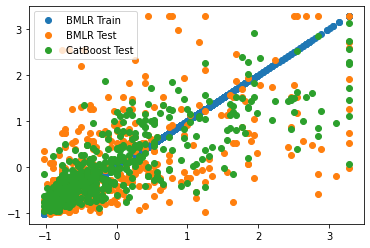

In [13]:
plt.plot(y_train, opt_model_bmlr.predict(X_train), 'o', label='BMLR Train')
plt.plot(y_test, opt_model_bmlr.predict(X_test), 'o', label='BMLR Test')
plt.plot(y_test, opt_pred_cb, 'o', label='CatBoost Test')
plt.legend()

In [14]:
import joblib
joblib.dump(model_rf, 'communities_rf.joblib')
joblib.dump(model_svr, 'communities_svr.joblib')
joblib.dump(model_cb, 'communities_cb.joblib')
joblib.dump(model_bmlr, 'communities_mbrf.joblib')

NameError: name 'model_rf' is not defined